In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import time
from fastai.vision import *
from fastai.metrics import accuracy

# Load Data

In [2]:
dir_path = Path("../input/intel-image-classification/")

In [3]:
np.random.seed(int(time.time()))

In [4]:
BATCH_SIZE = 64
SIZE = 150

In [5]:
data = ImageDataBunch.from_folder(path=dir_path, 
                                  train='seg_train',
                                  valid='seg_test',
                                  test='seg_pred',
                                  ds_tfms=get_transforms(), 
                                  size=SIZE,
                                  bs=BATCH_SIZE).normalize(imagenet_stats)

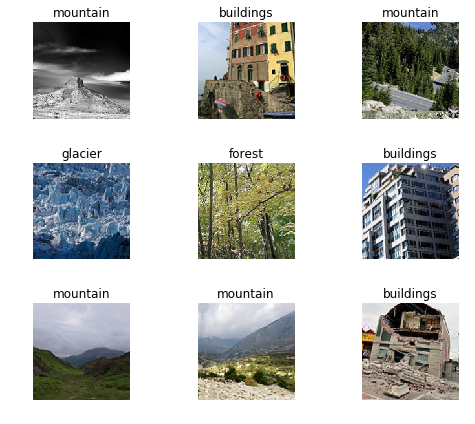

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
print(data.classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


# Train Model

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 195MB/s]


In [9]:
learn.model_dir = "/kaggle/working/"

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-04
Min loss divided by 10: 5.75E-03


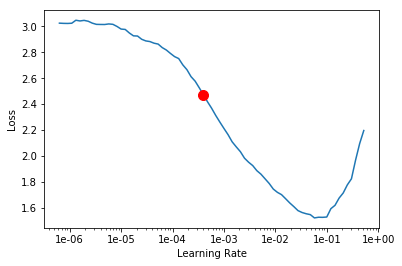

In [10]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [11]:
learn.fit_one_cycle(5, slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.533608,0.361899,0.884000,01:16
1,0.354930,0.275510,0.906333,01:19
2,0.280649,0.238055,0.912333,01:13
3,0.227538,0.221099,0.921667,01:07
4,0.200932,0.219385,0.921667,01:06


In [12]:
learn.save('stage-1-res50')

# Fine Tune the Model

In [13]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.32E-07


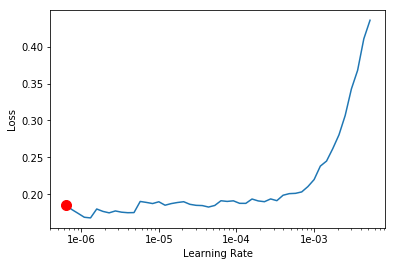

In [14]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [15]:
learn.fit_one_cycle(5, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.185645,0.228113,0.919333,01:10
1,0.181644,0.196757,0.930000,01:10
2,0.141678,0.188381,0.935667,01:33
3,0.115451,0.187587,0.939000,01:10
4,0.085114,0.186054,0.940000,01:10


In [16]:
learn.save('stage-2-res50')

# Analyze Results 

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

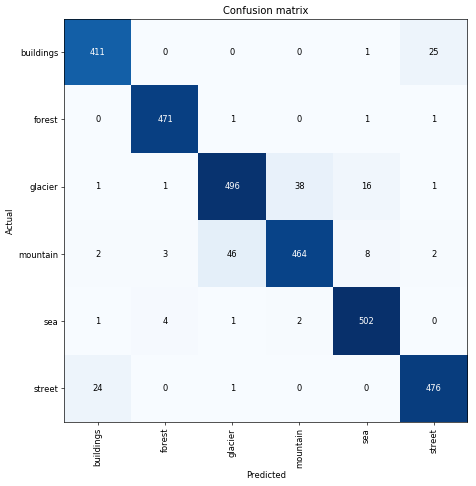

In [18]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

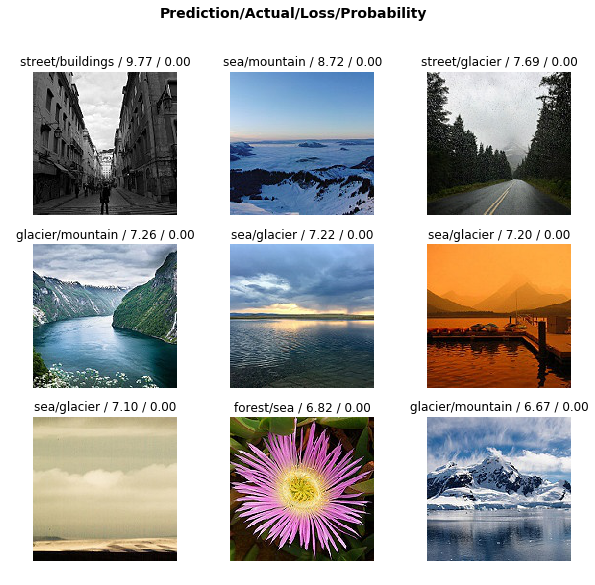

In [19]:
interp.plot_top_losses(9, figsize=(10,9))

In [20]:
interp.most_confused(min_val=2)

[('mountain', 'glacier', 46),
 ('glacier', 'mountain', 38),
 ('buildings', 'street', 25),
 ('street', 'buildings', 24),
 ('glacier', 'sea', 16),
 ('mountain', 'sea', 8),
 ('sea', 'forest', 4),
 ('mountain', 'forest', 3),
 ('mountain', 'buildings', 2),
 ('mountain', 'street', 2),
 ('sea', 'mountain', 2)]